In [6]:
from helpers import *

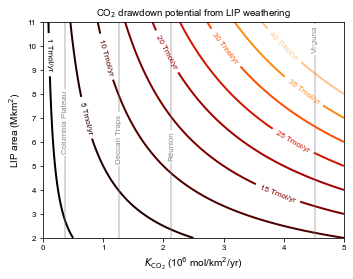

In [7]:
# parameter grid
KCO2_values = np.linspace(0.0, 5.0, 101)     # x-axis
A_values    = np.linspace(2.0, 11.0, 100)    # y-axis: area [Mkm^2]
KCO2_grid, A_grid = np.meshgrid(KCO2_values, A_values)

# total CO2 drawdown rate [Tmol/yr]
LIP_CO2 = KCO2_grid*1e6/1e18*1e6*A_grid*1e6


# -- make plot ---
fig = plt.figure(figsize=(4.18, 3))
ax = fig.add_axes([0, 0, 1, 1])

# contour
levels = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45]
contour = ax.contour(KCO2_grid, A_grid, LIP_CO2, levels=levels,
                             cmap='gist_heat', linewidths=2)
ax.clabel(contour, inline=True, fontsize=8, fmt='%0.0f Tmol/yr')

# --- annotations ---
vlines = [
    {"x": 0.36, "label": "Columbia Plateau",  "y": 5.5}, # Dessert et al 2003
    {"x": 1.26, "label": "Deccan Traps",  "y": 5.1}, # Dessert et al 2003
    {"x": 4.52, "label": "Virguna",  "y": 9.7}, # Li et al 2016
    {"x":2.13, "label": "Réunion", "y":5.2}, # Li et al 2016
]

for v in vlines:
    ax.axvline(v["x"], color="grey", ls="-", lw=2, alpha=0.3)
    ax.text(v["x"], v["y"], v["label"], rotation=90, color="grey", alpha=0.9,
                    va="bottom", ha="center", fontsize=8,
                    bbox=dict(facecolor='white', edgecolor='none', pad=2))


# --- formatting ---
ax.set_xlabel(r'$K_{\mathrm{CO_2}}$ (10$^6$ mol/km$^2$/yr)')
ax.set_ylabel('LIP area (Mkm$^2$)')
ax.set_title("CO$_2$ drawdown potential from LIP weathering")

figname="LIP_Cimb_KCO2.pdf"
savefig(fig,figname,savefmt='pdf',supp_folder="supp")
plt.show()